In [1]:
import os

os.environ['KERAS_BACKEND'] = 'torch'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
import matplotlib as mpl

mpl.rc('font', family='serif', serif='cm10')
mpl.rc('text', usetex=True)
mpl.rcParams['font.size'] = 12.0
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{bm}\usepackage{textcomp}'

In [3]:
data = {
    # 'traj_gru1_d=100_lr=0.001_custom-full_101ep_torch': [r'$\eta=0.001$, with pre-training'],
    # 'traj_gru1_d=100_lr=0.01_custom-full_101ep_torch': [r'$\eta=0.01$, with pre-training'],
    # 'traj_gru1_d=100_lr=0.01_custom-no-pre_100ep_torch': [r'$\eta=0.01$, no pre-training'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_300ep_Adam(lr=0.001)_torch/*.pkl': [r'Adam($\eta=0.001$)'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_300ep_RMSprop(lr=0.001)_torch/*.pkl': [r'RMSprop($\eta=0.001$)']
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_300ep_SGD(lr=0.01)_torch/*.pkl': [r'SGD($\eta=10^{-2}$)'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_300ep_SGD(lr=0.001)_torch/*.pkl': [r'SGD($\eta=10^{-3}$), pre-trained 1 epoch using SGD, 1x 100D GRU'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_300ep_SGD(lr=1e-04)_torch/*.pkl': [r'SGD($\eta=10^{-4}$)']
    # '../logs/block-stack/full-logs/traj_gru1-d=100_traj=25_custom-full_200ep_SGD(lr=0.001)_gamma=1.0_torch/*.pkl': [r'SGD($\eta=10^{-3}$), $\gamma=1.0$'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_200ep_SGD(lr=0.001)_gamma=1.01_torch/*.pkl': [r'SGD($\eta=10^{-3}$), $\gamma=1.01$'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_200ep_SGD(lr=1e-04)_gamma=1.01_torch/*.pkl': [r'SGD($\eta=10^{-4}$), $\gamma=1.01$'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_200ep_SGD(lr=0.001)_gamma=1.025_torch/*.pkl': [r'SGD($\eta=10^{-3}$), $\gamma=1.025$'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_200ep_SGD(lr=1e-04)_gamma=1.025_torch/*.pkl': [r'SGD($\eta=10^{-4}$), $\gamma=1.025$'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_200ep_SGD(lr=0.001)_gamma=1.05_torch/*.pkl': [r'SGD($\eta=10^{-3}$), $\gamma=1.05$'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_200ep_SGD(lr=0.01)_gamma=1.0_no-pre_torch/*.pkl': [r'SGD($\eta=10^{-2}$), no pre-training'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_200ep_SGD(lr=0.001)_gamma=1.0_no-pre_torch/*.pkl': [r'SGD($\eta=10^{-3}$), no pre-training'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_200ep_SGD(lr=1e-04)_gamma=1.0_no-pre_torch/*.pkl': [r'SGD($\eta=10^{-4}$), no pre-training'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_200ep_SGD(lr=0.001,momentum=0.9)_gamma=1.025_torch/*.pkl': [r'SGD($\eta=10^{-3},\mu=0.9$), $\gamma=1.025$'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_200ep_SGD(lr=0.001,momentum=0.0)_gamma=1.1_torch/*.pkl': [r'SGD($\eta=10^{-3}$), $\gamma=1.1$'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_200ep_Adam(lr=0.001)_gamma=1.025_torch/*.pkl': [r'Adam($\eta=0.001$), $\gamma=1.025$'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_200ep_SGD(lr=0.001,momentum=0.0)_gamma=1.0_last-err-isolated_torch/*.pkl': [r'SGD($\eta=10^{-3}$), last $\mathcal{L}_{FM}$ isolated'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_200ep_SGD(lr=0.001,momentum=0.0)_gamma=csch__torch/*.pkl': [r'SGD($\eta=10^{-3}$), csch boosting'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full_200ep_SGD(lr=0.001,momentum=0.0)_gamma=1.0_last-err-isolated_batch=1_train=0.1_torch/*.pkl': [r'SGD($\eta=10^{-3}$), last $\mathcal{L}_{FM}$ isolated, sequential training, 10% of data'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full-pre3_200ep_SGD(lr=0.001,momentum=0.0)_gamma=1.0_last-err-isolated_torch/*.pkl': [r'SGD($\eta=10^{-3}$), pre-trained 3 epochs, last $\mathcal{L}_{FM}$ isolated'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full-pre10_200ep_SGD(lr=0.001,momentum=0.0)_gamma=1.0_last-err-isolated_torch/*.pkl': [r'SGD($\eta=10^{-3}$), pre-trained 10 epochs, last $\mathcal{L}_{FM}$ isolated'],
    # '../logs/block-stack/reproducible/traj_gru1-d=100_traj=25_custom-full-pre50_200ep_SGD(lr=0.001,momentum=0.0)_gamma=1.0_last-err-isolated_torch/*.pkl': [r'SGD($\eta=10^{-3}$), pre-trained 50 epochs, last $\mathcal{L}_{FM}$ isolated'],
    # '../logs/block-stack/reproducible/traj_gru2-d=200_traj=25_custom-full-pre1-Adam_200ep_SGD(lr=0.001,momentum=0.0)_gamma=1.0_last-err-isolated_torch/*.pkl': [r'SGD($\eta=10^{-3}$), 200 epochs, pre-trained 1 epoch using Adam, last $\mathcal{L}_{FM}$ isolated, 2x 200D GRU'],
    # '../logs/block-stack/reproducible/traj_gru2-d=200_traj=25_custom-full-pre1-SGD_200ep_SGD(lr=0.001,momentum=0.0)_gamma=1.0_last-err-isolated_torch/*.pkl': [r'SGD($\eta=10^{-3}$), pre-trained 1 epoch using SGD, last $\mathcal{L}_{FM}$ isolated, 2x 200D GRU'],
    # '../logs/block-stack/reproducible/traj_gru2-d=200_traj=25_custom-full-pre10-SGD_200ep_SGD(lr=0.001,momentum=0.0)_gamma=1.0_last-err-isolated_torch/*.pkl': [r'SGD($\eta=10^{-3}$), pre-trained 10 epochs using SGD, last $\mathcal{L}_{FM}$ isolated, 2x 200D GRU'],
    # '../logs/block-stack/reproducible/traj_gru2-d=200_traj=25_custom-full-pre1-Adam_1000ep_SGD(lr=0.001,momentum=0.0)_gamma=1.0_last-err-isolated_torch/*.pkl': [r'SGD($\eta=10^{-3}$), 1000 epochs, pre-trained 1 epoch using Adam, last $\mathcal{L}_{FM}$ isolated, 2x 200D GRU'],
    # '../logs/block-stack/reproducible/traj_gru2-d=200_traj=25_custom-full-pre10-SGD_1000ep_SGD(lr=0.001,momentum=0.0)_gamma=1.0_last-err-isolated_torch/*.pkl': [r'SGD($\eta=10^{-3}$), 1000 epochs, pre-trained 10 epoch using SGD, last $\mathcal{L}_{FM}$ isolated, 2x 200D GRU']
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_100ep_SGD(lr=0.01,momentum=0)_gamma=1.0/*.pkl': [r'SGD($\eta=0.01$)'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_100ep_SGD(lr=0.001,momentum=0)_gamma=1.0/*.pkl': [r'SGD($\eta=10^{-3}$)'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_100ep_SGD(lr=0.05,momentum=0)_gamma=1.0/*.pkl': [r'SGD($\eta=0.05$)'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_100ep_SGD(lr=0.1,momentum=0)_gamma=1.0/*.pkl': [r'SGD($\eta=0.1$)'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_100ep_SGD(lr=1.0,momentum=0)_gamma=1.0/*.pkl': [r'SGD($\eta=1.0$)'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_100ep_Adam(lr=0.01)_gamma=1.0/*.pkl': [r'Adam($\eta=0.01$)'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_200ep_RMSprop(lr=0.01)_gamma=1.0/*.pkl': [r'RMSprop($\eta=10^{-2}$)'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_200ep_RMSprop(lr=0.001)_gamma=1.0/*.pkl': [r'RMSprop($\eta=10^{-3}$)'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_1000ep_Adam(lr=0.01)_gamma=1.0/*.pkl': [r'Adam($\eta=10^{-2}$)'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_1000ep_Adam(lr=0.001)_gamma=1.0/*.pkl': [r'Adam($\eta=10^{-3}$)'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_1000ep_SGD(lr=0.01,momentum=0)_gamma=1.0/*.pkl': [r'SGD($\eta=10^{-2}$)'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_1000ep_SGD(lr=1.0,momentum=0)_gamma=1.0/*.pkl': [r'SGD($\eta=1.0$)'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full-no-pre_1000ep_Adam(lr=0.001)_gamma=1.0_no-pre/*.pkl': [r'Adam($\eta=10^{-3}$), no pre-training'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full-no-pre_1000ep_RMSprop(lr=0.01)_gamma=1.0_no-pre/*.pkl': [r'RMSprop($\eta=10^{-2}$), no pre-training'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full-no-pre_1000ep_RMSprop(lr=0.001)_gamma=1.0_no-pre/*.pkl': [r'RMSprop($\eta=10^{-3}$), no pre-training'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full-no-pre_1000ep_SGD(lr=0.01,momentum=0)_gamma=1.0_no-pre/*.pkl': [r'SGD($\eta=10^{-2}$), no pre-training'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full-no-pre_1000ep_SGD(lr=1.0,momentum=0)_gamma=1.0_no-pre/*.pkl': [r'SGD($\eta=1.0$), no pre-training'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full-no-pre_100ep_Adam(lr=0.01)_gamma=1.0_last-err-isolated_eff-only/*.pkl': [r'Adam($\eta=10^{-2}$), effector prediction only'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full-no-pre_100ep_RMSprop(lr=0.01)_gamma=1.0_last-err-isolated_eff-only/*.pkl': [r'RMSprop($\eta=10^{-2}$), effector prediction only'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full-no-pre_100ep_SGD(lr=0.01,momentum=0)_gamma=1.0_last-err-isolated_eff-only/*.pkl': [r'SGD($\eta=10^{-2}$), effector prediction only'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full-no-pre_100ep_SGD(lr=1.0,momentum=0)_gamma=1.0_last-err-isolated_eff-only/*.pkl': [r'SGD($\eta=1.0$), effector prediction only']
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=10_custom-full-no-pre_20ep_RMSprop(lr=0.01)_gamma=1.0_2xlast-err-isolated_eff-only_no-pre/*.pkl': [r'RMSprop($\eta=10^{-2}$), effector prediction only, 2x final error boost'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=10_custom-full-no-pre_20ep_RMSprop(lr=0.01)_gamma=1.0_3xlast-err-isolated_eff-only_no-pre/*.pkl': [r'RMSprop($\eta=10^{-2}$), effector prediction only, 3x final error boost'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=10_custom-full-no-pre_20ep_RMSprop(lr=0.01)_gamma=1.0_4xlast-err-isolated_eff-only_no-pre/*.pkl': [r'RMSprop($\eta=10^{-2}$), effector prediction only, 4x final error boost'],
    # '../logs/kinematics/full-logs/traj_gru1-d=100_traj=10_custom-full-no-pre_20ep_SGD(lr=1.0,momentum=0)_gamma=1.0_2xlast-err-isolated_eff-only_no-pre/*.pkl': [r'SGD($\eta=1.0$), effector prediction only, 2x final error boost'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_RMSprop(lr=0.01)_gamma=1.0_last-err-isolated_eff-only_no-pre/*.pkl': [r'RMSprop($\eta=0.01$), effector prediction only'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_SGD(lr=0.1,momentum=0)_gamma=1.0_last-err-isolated_eff-only_no-pre/*.pkl': [r'SGD($\eta=0.1$), effector prediction only'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_SGD(lr=1.0,momentum=0)_gamma=1.0_last-err-isolated_eff-only_no-pre/*.pkl': [r'SGD($\eta=1.0$), effector prediction only'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_SGD(lr=2.0,momentum=0)_gamma=1.0_last-err-isolated_eff-only_no-pre/*.pkl': [r'SGD($\eta=2.0$), effector prediction only']
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_RMSprop(lr=0.01)_gamma=1.0_closest-state-err_eff-only_no-pre/*.pkl': [r'RMSprop($\eta=0.01$), effector prediction only, closest state optimization'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_RMSprop(lr=0.001)_gamma=1.0_closest-state-err_eff-only_no-pre/*.pkl': [r'RMSprop($\eta=0.001$), effector prediction only, closest state optimization'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_SGD(lr=0.1,momentum=0)_gamma=1.0_closest-state-err_eff-only_no-pre/*.pkl': [r'SGD($\eta=0.1$), effector prediction only, closest state optimization'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_SGD(lr=1.0,momentum=0)_gamma=1.0_closest-state-err_eff-only_no-pre/*.pkl': [r'SGD($\eta=1.0$), effector prediction only, closest state optimization'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_RMSprop(lr=0.01)_gamma=1.0_closest-si-sf-err_eff-only_no-pre/*.pkl': [r'RMSprop($\eta=0.01$), effector prediction only, closest states to $\mathbf{s}_0, \mathbf{s}_T$'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_RMSprop(lr=0.001)_gamma=1.0_closest-si-sf-err_eff-only_no-pre/*.pkl': [r'RMSprop($\eta=0.001$), effector prediction only, closest states to $\mathbf{s}_0, \mathbf{s}_T$'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_SGD(lr=1.0,momentum=0)_gamma=1.0_closest-si-sf-err_eff-only_no-pre/*.pkl': [r'SGD($\eta=1.0$), effector prediction only, closest states to $\mathbf{s}_0, \mathbf{s}_T$'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_RMSprop(lr=0.01)_gamma=1.0_closest-si-sf-err_no-intermediate-err_eff-only_no-pre/*.pkl': [r'RMSprop($\eta=0.01$), effector prediction only, closest states to $\mathbf{s}_0, \mathbf{s}_T$, no intermediate error'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_SGD(lr=1.0,momentum=0)_gamma=1.0_closest-si-sf-err_no-intermediate-err_eff-only_no-pre/*.pkl': [r'SGD($\eta=1.0$), effector prediction only, closest states to $\mathbf{s}_0, \mathbf{s}_T$, no intermediate error'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_25ep_RMSprop(lr=0.01)_gamma=1.0_closest-si0-sf-err_eff-only_no-pre/*.pkl': [r'RMSprop($\eta=0.01$), effector prediction only, optimizing $\mathbf{\hat{s}}_0$ and the closest $\mathbf{\hat{s}}_i$ to $\mathbf{s}_T$'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_25ep_RMSprop(lr=0.001)_gamma=1.0_closest-si0-sf-err_eff-only_no-pre/*.pkl': [r'RMSprop($\eta=10^{-3}$), effector prediction only, optimizing $\mathbf{\hat{s}}_0$ and the closest $\mathbf{\hat{s}}_i$ to $\mathbf{s}_T$'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_25ep_RMSprop(lr=0.0005)_gamma=1.0_closest-si0-sf-err_eff-only_no-pre/*.pkl': [r'RMSprop($\eta=5 \times 10^{-4}$), effector prediction only, optimizing $\mathbf{\hat{s}}_0$ and the closest $\mathbf{\hat{s}}_i$ to $\mathbf{s}_T$'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_25ep_SGD(lr=0.1,momentum=0)_gamma=1.0_closest-si0-sf-err_eff-only_no-pre/*.pkl': [r'SGD($\eta=0.1$), effector prediction only, optimizing $\mathbf{\hat{s}}_0$ and the closest $\mathbf{\hat{s}}_i$ to $\mathbf{s}_T$'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_25ep_SGD(lr=1.0,momentum=0)_gamma=1.0_closest-si0-sf-err_eff-only_no-pre/*.pkl': [r'SGD($\eta=1.0$), effector prediction only, optimizing $\mathbf{\hat{s}}_0$ and the closest $\mathbf{\hat{s}}_i$ to $\mathbf{s}_T$'],
    '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_50ep_Adam(lr=0.001)_gamma=1.0_closest-si0-sf-err_eff-only_no-pre/*.pkl': [r'Adam($\eta=10^{-3}$), effector prediction only, optimizing $\mathbf{\hat{s}}(0)$ and the closest $\mathbf{\hat{s}}(i)$ to $\mathbf{s}(T)$'],
    '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_50ep_Adam(lr=0.0001)_gamma=1.0_closest-si0-sf-err_eff-only_no-pre/*.pkl': [r'Adam($\eta=10^{-4}$), effector prediction only, optimizing $\mathbf{\hat{s}}(0)$ and the closest $\mathbf{\hat{s}}(i)$ to $\mathbf{s}(T)$'],
    '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_50ep_RMSprop(lr=0.01)_gamma=1.0_closest-si0-sf0-err_eff-only_no-pre/*.pkl': [r'RMSprop($\eta=10^{-2}$), effector prediction only, optimizing $\mathbf{\hat{s}}(0)$ and $\mathbf{\hat{s}}(T-1)$'],
    '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_50ep_RMSprop(lr=0.001)_gamma=1.0_closest-si0-sf0-err_eff-only_no-pre/*.pkl': [r'RMSprop($\eta=10^{-3}$), effector prediction only, optimizing $\mathbf{\hat{s}}(0)$ and $\mathbf{\hat{s}}(T-1)$'],
    '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_50ep_SGD(lr=0.5,momentum=0)_gamma=1.0_closest-si0-sf0-err_eff-only_no-pre/*.pkl': [r'SGD($\eta=0.5$), effector prediction only, optimizing $\mathbf{\hat{s}}(0)$ and $\mathbf{\hat{s}}(T-1)$'],
    '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_50ep_SGD(lr=1.0,momentum=0)_gamma=1.0_closest-si0-sf0-err_eff-only_no-pre/*.pkl': [r'SGD($\eta=1.0$), effector prediction only, optimizing $\mathbf{\hat{s}}(0)$ and $\mathbf{\hat{s}}(T-1)$'],
    '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_150ep_RMSprop(lr=0.001)_gamma=1.0_closest-si0-sf0-err_eff-only_no-pre/*.pkl': [r'RMSprop($\eta=10^{-3}$). effector prediction only, optimizing $\mathbf{\hat{s}}(0)$ and $\mathbf{\hat{s}}(T-1)$'],
    # '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_150ep_RMSprop(lr=0.001)_gamma=1.0_closest-si0-sf0-err_no-intermediate-err_eff-only_no-pre/*.pkl': [r'RMSprop($\eta=10^{-3}$). effector prediction only, optimizing $\mathbf{\hat{s}}(0)$ and $\mathbf{\hat{s}}(T-1)$, no intermediate errors'],
}

In [3]:
import glob
import os


def get_files(path: str) -> list[str]:
    n_files = len(glob.glob(path))
    dir_path = os.path.dirname(path)

    return [
        os.path.join(dir_path, f'training_{file_idx}.pkl')
        for file_idx in range(n_files)
    ]

Adam($\eta=10^{-3}$), effector prediction only, optimizing $\mathbf{\hat{s}}(0)$ and the closest $\mathbf{\hat{s}}(i)$ to $\mathbf{s}(T)$: 0.0838
Adam($\eta=10^{-4}$), effector prediction only, optimizing $\mathbf{\hat{s}}(0)$ and the closest $\mathbf{\hat{s}}(i)$ to $\mathbf{s}(T)$: 0.1700
RMSprop($\eta=10^{-2}$), effector prediction only, optimizing $\mathbf{\hat{s}}(0)$ and $\mathbf{\hat{s}}(T-1)$: 0.0396
RMSprop($\eta=10^{-3}$), effector prediction only, optimizing $\mathbf{\hat{s}}(0)$ and $\mathbf{\hat{s}}(T-1)$: 0.0173
SGD($\eta=0.5$), effector prediction only, optimizing $\mathbf{\hat{s}}(0)$ and $\mathbf{\hat{s}}(T-1)$: 0.0344
SGD($\eta=1.0$), effector prediction only, optimizing $\mathbf{\hat{s}}(0)$ and $\mathbf{\hat{s}}(T-1)$: 0.0477
RMSprop($\eta=10^{-3}$). effector prediction only, optimizing $\mathbf{\hat{s}}(0)$ and $\mathbf{\hat{s}}(T-1)$: 0.0259


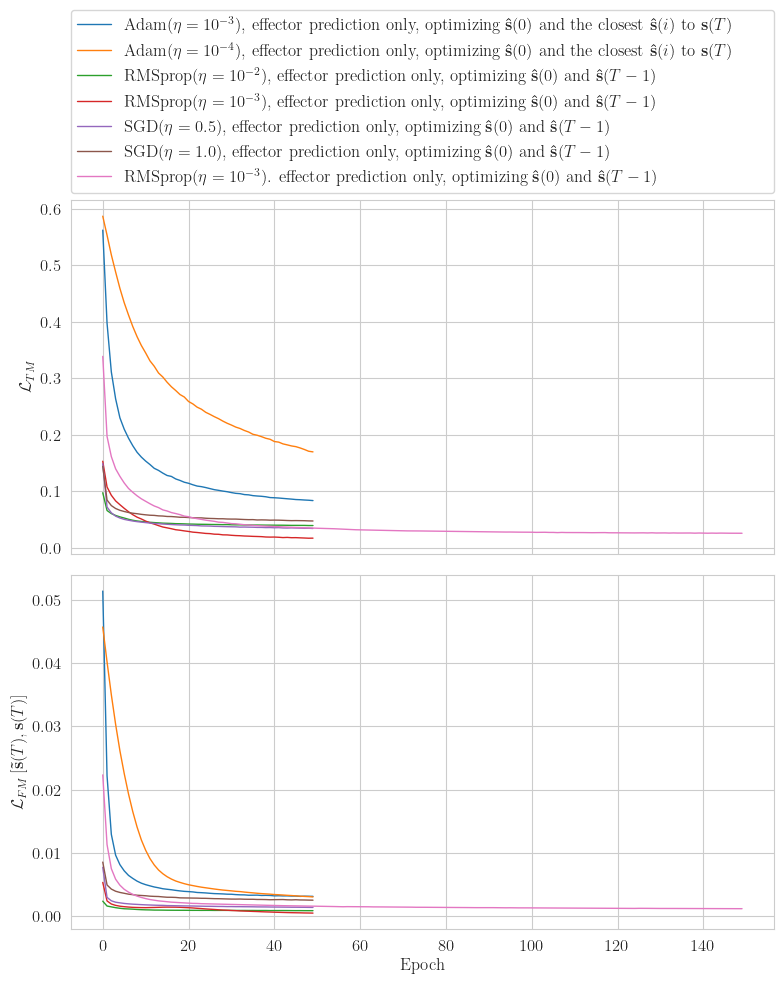

In [41]:
import pickle
import matplotlib.pyplot as plt

for fname in data:
    ep_losses = []
    ep_metrics = []

    for path in get_files(fname):
        with open(path, 'rb') as f:
            ep_loss, ep_metric, _ = pickle.load(f)
            ep_losses += ep_loss
            ep_metrics += ep_metric

    data[fname] += [ep_losses, ep_metrics]

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(8, 10))

for label, losses, metrics in data.values():
    print(f'{label}: {losses[-1]:.4f}')
    ax1.plot(losses, linewidth=1, label=label)
    ax2.plot(metrics, linewidth=1, label=label)

ax2.set_xlabel('Epoch')

# ax1.set_ylabel(r'$\mathcal{L}^{(II)}_{TM}$')
ax1.set_ylabel(r'$\mathcal{L}_{TM}$')
ax2.set_ylabel(r'$\mathcal{L}_{FM}\left[\mathbf{\tilde{s}}(T), \mathbf{s}(T)\right]$')

ax1.legend(
    bbox_to_anchor=(0., 1.02, 1., .102),
    loc='lower left',
    ncols=1,
    mode='expand',
    borderaxespad=0.
)

# ax1.set_xlim(0, 400)
# ax2.set_xlim(0, 400)

plt.tight_layout()
plt.show()
# plt.savefig('../plots/kinematics/traj_fixed_d-gru=20_closest-si0-sf0-err_sgd-rmsprop_adam_50ep.png', dpi=300)

In [4]:
import numpy as np
from keras.api.metrics import mean_squared_error

# def L_FM(y_pred: np.ndarray, y_true: np.ndarray):
#     partition_ids = [7]
#     y_true = np.hsplit(y_true, partition_ids)
#     y_pred = np.hsplit(y_pred, partition_ids)
#
#     mses = np.vstack([
#         mean_squared_error(y_true[i], y_pred[i]).cpu()
#         for i in range(len(y_true))
#     ])
#     l_fm_mean = np.mean(mses, axis=0)
#     l_fm_std = np.std(mses, axis=0)
#
#     return l_fm_mean, l_fm_std
#
#
# def L_FM_components(y_pred: np.ndarray, y_true: np.ndarray):
#     partition_ids = [7]
#     y_true = np.hsplit(y_true, partition_ids)
#     y_pred = np.hsplit(y_pred, partition_ids)
#
#     mses = np.vstack([
#         mean_squared_error(y_true[i], y_pred[i]).cpu()
#         for i in range(len(y_true))
#     ])
#
#     return mses

def L_FM(y_pred: np.ndarray, y_true: np.ndarray):
    partition_ids = [7]

    eff_true = (
        np.hsplit(y_true, partition_ids)[1]
        if y_true.shape[1] == 10
        else y_true
    )

    eff_pred = (
        np.hsplit(y_pred, partition_ids)[1]
        if y_pred.shape[1] == 10
        else y_pred
    )

    l_fm = mean_squared_error(eff_true, eff_pred).cpu()
    l_fm_std = np.zeros_like(l_fm)

    return l_fm, l_fm_std


/tmp/ipykernel_6529/1102498955.py:69: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


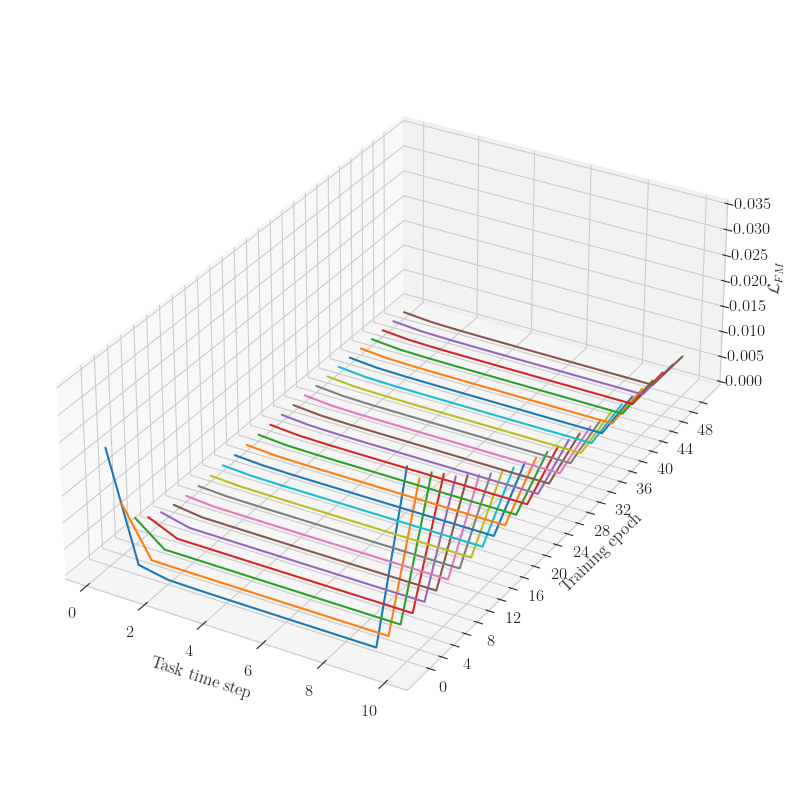

In [29]:
import pickle
import matplotlib.pyplot as plt

fig, axs = plt.subplots(
    ncols=len(data),
    subplot_kw={'projection': '3d'},
    # figsize=(35, 20)
    figsize=(10, 10)
)

if not isinstance(axs, np.ndarray):
    axs = np.array([axs])
# gammas = [1.0, 1.025, 1.05]

for idx, fname in enumerate(data):
    ep_data = []

    for path in get_files(fname):
        with open(path, 'rb') as f:
            ep_data += pickle.load(f)[-1]

    n_epochs = len(ep_data)
    ep_each = 2

    for epoch_i in range(n_epochs // ep_each + 1):
        epoch = max(epoch_i * ep_each - 1, 0)

        y_pred, y_rectified, s_final = zip(*[
            (batch['y_pred'], batch['y_rectified'], batch['s_final'])
            for batch in ep_data[epoch]
        ])

        y_pred = np.vstack(y_pred)
        y_rectified = np.vstack(y_rectified)
        s_final = np.vstack(s_final)

        T = y_pred.shape[1]

        err_mean, err_std = zip(*[
            L_FM(y_pred[:, t], y_rectified[:, t])
            for t in range(T)
        # ] + [L_FM(y_rectified[:, -1], s_final)])
        ] + [L_FM(y_pred[:, -1], s_final)])

        timesteps = list(range(T + 1))
        # weights = np.array([gammas[idx] ** t for t in timesteps])

        err_mean = np.mean(err_mean, axis=1)
        err_std = np.mean(err_std, axis=1)

        axs[idx].plot(timesteps, epoch_i, err_mean)
        # axs[idx].fill_between(
        #     timesteps, epoch_i, np.maximum(err_mean - err_std, 0),
        #     timesteps, epoch_i, err_mean + err_std,
        #     alpha=0.5
        # )

    # axs[idx].set_title(data[fname][0])

    axs[idx].set_xlabel('Task time step')
    axs[idx].set_ylabel('Training epoch')
    axs[idx].set_zlabel(r'$\mathcal{L}_{FM}$')

    axs[idx].set_yticks(list(range(n_epochs // ep_each + 1)))
    axs[idx].set_yticklabels([y * ep_each if y % ep_each == 0 else '' for y in range(n_epochs // ep_each + 1)])

    axs[idx].set_box_aspect((1.75, 3, 1))

plt.tight_layout()
plt.show()
# plt.savefig('../plots/kinematics/traj_fixed_d-gru=20_step-errors_rmsprop-sgd_adam_si0-sf0-errors_50ep.pdf')

In [5]:
import pickle

# fname = '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_100ep_SGD(lr=0.01,momentum=0)_gamma=1.0/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_100ep_SGD(lr=0.001,momentum=0)_gamma=1.0/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_100ep_SGD(lr=0.05,momentum=0)_gamma=1.0/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_100ep_SGD(lr=0.1,momentum=0)_gamma=1.0/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_100ep_SGD(lr=1.0,momentum=0)_gamma=1.0/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_100ep_Adam(lr=0.01)_gamma=1.0/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full-no-pre_1000ep_Adam(lr=0.001)_gamma=1.0_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full-no-pre_1000ep_SGD(lr=0.01,momentum=0)_gamma=1.0_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full-no-pre_1000ep_SGD(lr=1.0,momentum=0)_gamma=1.0_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full_1000ep_SGD(lr=1.0,momentum=0)_gamma=1.0/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full-no-pre_100ep_SGD(lr=1.0,momentum=0)_gamma=1.0_last-err-isolated_eff-only/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=100_traj=25_custom-full-no-pre_100ep_RMSprop(lr=0.01)_gamma=1.0_last-err-isolated_eff-only/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=100_traj=10_custom-full-no-pre_20ep_SGD(lr=1.0,momentum=0)_gamma=1.0_2xlast-err-isolated_eff-only_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=100_traj=10_custom-full-no-pre_20ep_RMSprop(lr=0.01)_gamma=1.0_4xlast-err-isolated_eff-only_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_SGD(lr=2.0,momentum=0)_gamma=1.0_last-err-isolated_eff-only_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_SGD(lr=1.0,momentum=0)_gamma=1.0_last-err-isolated_eff-only_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_RMSprop(lr=0.01)_gamma=1.0_last-err-isolated_eff-only_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_RMSprop(lr=0.01)_gamma=1.0_closest-state-err_eff-only_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_RMSprop(lr=0.001)_gamma=1.0_closest-state-err_eff-only_no-pre/*.pkl'                                          # [*]
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_SGD(lr=0.1,momentum=0)_gamma=1.0_closest-state-err_eff-only_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_SGD(lr=1.0,momentum=0)_gamma=1.0_closest-state-err_eff-only_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_RMSprop(lr=0.001)_gamma=1.0_closest-si-sf-err_eff-only_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_SGD(lr=1.0,momentum=0)_gamma=1.0_closest-si-sf-err_eff-only_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_RMSprop(lr=0.01)_gamma=1.0_closest-si-sf-err_no-intermediate-err_eff-only_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_100ep_SGD(lr=1.0,momentum=0)_gamma=1.0_closest-si-sf-err_no-intermediate-err_eff-only_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_25ep_RMSprop(lr=0.001)_gamma=1.0_closest-si0-sf-err_eff-only_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_25ep_SGD(lr=1.0,momentum=0)_gamma=1.0_closest-si0-sf-err_eff-only_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_50ep_Adam(lr=0.001)_gamma=1.0_closest-si0-sf-err_eff-only_no-pre/*.pkl'                                         # [o]
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_50ep_Adam(lr=0.0001)_gamma=1.0_closest-si0-sf-err_eff-only_no-pre/*.pkl'                                        # [o]
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_50ep_RMSprop(lr=0.01)_gamma=1.0_closest-si0-sf0-err_eff-only_no-pre/*.pkl'                                      # [o]
fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_50ep_RMSprop(lr=0.001)_gamma=1.0_closest-si0-sf0-err_eff-only_no-pre/*.pkl'                                     # [*]
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_50ep_SGD(lr=0.5,momentum=0)_gamma=1.0_closest-si0-sf0-err_eff-only_no-pre/*.pkl'                                # [o]
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_50ep_SGD(lr=1.0,momentum=0)_gamma=1.0_closest-si0-sf0-err_eff-only_no-pre/*.pkl'                                # [o]
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_150ep_RMSprop(lr=0.001)_gamma=1.0_closest-si0-sf0-err_eff-only_no-pre/*.pkl'
# fname = '../logs/kinematics/full-logs/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_150ep_RMSprop(lr=0.001)_gamma=1.0_closest-si0-sf0-err_no-intermediate-err_eff-only_no-pre/*.pkl'

ep_data = []

for path in get_files(fname):
    with open(path, 'rb') as f:
        ep_data += pickle.load(f)[-1]

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider

fig, ax = plt.subplots(figsize=(8, 6))

def update(epoch=0, y_neighborhood=0):
    y_pred, y_rectified, s_final = zip(*[
        (batch['y_pred'], batch['y_rectified'], batch['s_final'])
        for batch in ep_data[epoch]
    ])

    y_pred = np.vstack(y_pred)
    y_rectified = np.vstack(y_rectified)
    s_final = np.vstack(s_final)

    T = y_pred.shape[1]

    err_mean, err_std = zip(*[
        L_FM(y_pred[:, t], y_rectified[:, t])
        for t in range(T)
    ] + [L_FM(y_rectified[:, -1], s_final)])

    err_mean = np.mean(err_mean, axis=1)
    err_std = np.mean(err_std, axis=1)

    ax.clear()

    timesteps = list(range(T + 1))
    ax.plot(timesteps, err_mean)
    ax.fill_between(timesteps, np.maximum(err_mean - err_std, 0), err_mean + err_std, alpha=0.5)

    ax.set_axisbelow(True)
    ax.grid(True)

    ax.axvline(1, linestyle='--', linewidth=1.5, color='red')
    ax.axvline(T - 1, linestyle='--', linewidth=1.5, color='red')

    ax.set_title(f'{data[fname][0]}, training epoch {epoch}')

    ax.set_xlabel('Task time step')
    ax.set_ylabel(r'$\mathcal{L}_{FM}$')

    ax.set_xticks(list(range(0, 41, 5)) + [1, 39])

    if y_neighborhood > 0:
        y_center = np.mean(err_mean[1:-1])
        ax.set_ylim(max(y_center - y_neighborhood, 0), y_center + y_neighborhood)

    fig.canvas.draw()

# plt.tight_layout()
# plt.show()
interact(
    update,
    epoch=IntSlider(
        value=0,
        min=0,
        max=len(ep_data) - 1,
        step=1
    ),
    y_neighborhood=FloatSlider(
        value=0.0,
        min=0.0,
        max=0.5,
        step=0.001,
        readout_format='.3f'
    )
);

<IPython.core.display.Javascript object>

interactive(children=(IntSlider(value=0, description='epoch', max=299), FloatSlider(value=0.0, description='y_…

In [16]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from tqdm.notebook import tqdm


def plot(epoch=0, y_neighborhood=0):
    fig, ax = plt.subplots(figsize=(8, 6))

    y_pred, y_rectified, s_final = zip(*[
        (batch['y_pred'], batch['y_rectified'], batch['s_final'])
        for batch in ep_data[epoch]
    ])

    y_pred = np.vstack(y_pred)
    y_rectified = np.vstack(y_rectified)
    s_final = np.vstack(s_final)

    T = y_pred.shape[1]

    err_mean, err_std = zip(*[
        L_FM(y_pred[:, t], y_rectified[:, t])
        for t in range(T)
    ] + [L_FM(y_rectified[:, -1], s_final)])

    err_mean = np.mean(err_mean, axis=1)
    err_std = np.mean(err_std, axis=1)

    ax.clear()

    timesteps = list(range(T + 1))
    ax.plot(timesteps, err_mean)
    ax.fill_between(timesteps, np.maximum(err_mean - err_std, 0), err_mean + err_std, alpha=0.5)

    ax.set_axisbelow(True)
    ax.grid(True)

    ax.axvline(1, linestyle='--', linewidth=1.5, color='red')
    ax.axvline(T - 1, linestyle='--', linewidth=1.5, color='red')

    ax.set_title(f'{data[fname][0]}, training epoch {epoch}')

    ax.set_xlabel('Task time step')
    ax.set_ylabel(r'$\mathcal{L}_{FM}$')

    ax.set_xticks(list(range(0, T + 1, 5)) + [1, T - 1])

    if y_neighborhood > 0:
        y_center = np.mean(err_mean[1:-1])
        ax.set_ylim(max(y_center - y_neighborhood, 0), y_center + y_neighborhood)

    return fig


pp = PdfPages('../plots/kinematics/traj_custom_adam_epochs_lr=0.01.pdf')

for epoch in tqdm(range(len(ep_data))):
    pp.savefig(plot(epoch))
    plt.close()

pp.close()

  0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from tqdm.notebook import tqdm


def plot_stacked(epoch=0):
    fig, ax = plt.subplots(figsize=(8, 6))

    y_pred, y_rectified, s_final = zip(*[
        (batch['y_pred'], batch['y_rectified'], batch['s_final'])
        for batch in ep_data[epoch]
    ])

    y_pred = np.vstack(y_pred)
    y_rectified = np.vstack(y_rectified)
    s_final = np.vstack(s_final)

    T = y_pred.shape[1]

    err_comps = np.vstack([
        np.mean(L_FM_components(y_pred[:, t], y_rectified[:, t]), axis=1)
        for t in range(T)
    ] + [np.mean(L_FM_components(y_rectified[:, -1], s_final), axis=1)]).T

    err_mean, err_std = zip(*[
        L_FM(y_pred[:, t], y_rectified[:, t])
        for t in range(T)
    ] + [L_FM(y_rectified[:, -1], s_final)])

    err_mean = np.mean(err_mean, axis=1)
    err_std = np.mean(err_std, axis=1)

    ax.clear()

    timesteps = list(range(T + 1))
    ax.plot(timesteps, err_mean, linestyle='--')
    # ax.fill_between(timesteps, np.maximum(err_mean - err_std, 0), err_mean + err_std, alpha=0.5)
    ax.stackplot(
        timesteps, err_comps,
        labels=['Joint config.', 'Eff. position'],
        alpha=0.75
    )

    ax.set_axisbelow(True)
    ax.grid(True)

    ax.axvline(1, linestyle='--', linewidth=1.5, color='red')
    ax.axvline(T - 1, linestyle='--', linewidth=1.5, color='red')

    ax.set_title(f'{data[fname][0]}, training epoch {epoch}')

    ax.legend()
    ax.set_xlabel('Task time step')
    ax.set_ylabel(r'$\mathcal{L}_{FM}$')

    ax.set_xticks(list(range(0, T + 1, 5)) + [1, T - 1])

    return fig


pp = PdfPages('../plots/kinematics/traj_custom_sgd_epochs-comps_lr=1.0_1000ep_no-pre.pdf')

for epoch in tqdm(range(len(ep_data))):
    pp.savefig(plot_stacked(epoch))
    plt.close()

pp.close()

  0%|          | 0/1000 [00:00<?, ?it/s]

In [83]:
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

fig, ax = plt.subplots(
    subplot_kw={'projection': '3d'},
    figsize=(8, 6)
)

batch_size = ep_data[0][0]['s_init'].shape[0]


def update(epoch, traj_idx):
    batch_idx = traj_idx // batch_size
    traj_i = traj_idx % batch_size

    partition_ids = [7]

    s_init = ep_data[epoch][batch_idx]['s_init'][traj_i]
    s_final = ep_data[epoch][batch_idx]['s_final'][traj_i]
    traj_pred = ep_data[epoch][batch_idx]['y_pred'][traj_i]
    traj_rect = ep_data[epoch][batch_idx]['y_rectified'][traj_i]

    T = traj_pred.shape[0]

    _, eff_pos_init = np.hsplit(s_init, partition_ids)
    _, eff_pos_final = np.hsplit(s_final, partition_ids)
    # _, eff_pos_pred = np.hsplit(traj_pred, partition_ids)
    # _, eff_pos_rect = np.hsplit(traj_rect, partition_ids)
    eff_pos_pred = traj_pred
    eff_pos_rect = traj_rect

    ax.clear()

    ax.scatter(*eff_pos_init, marker='$E$', s=100, color='C0', label='Initial effector position')
    ax.scatter(*eff_pos_final, marker='$E$', s=100, color='C1', label='Final effector position')

    ax.scatter(
        eff_pos_pred[:, 0], eff_pos_pred[:, 1], eff_pos_pred[:, 2],
        c=list(range(T)), cmap='spring',
        s=50,
        edgecolors='none',
        alpha=1.0,
        label='Effector predicted position'
    )
    ax.scatter(
        eff_pos_rect[:, 0], eff_pos_rect[:, 1], eff_pos_rect[:, 2],
        marker='*',
        s=80,
        c=list(range(T + 1)), cmap='copper',
        edgecolors='none',
        alpha=1.0,
        label='Effector rectified position'
    )

    ax.set_xlim(-0.4, 0.4)
    ax.set_ylim(0.4, 0.6)
    ax.set_zlim(0.08, 0.9)

    ax.legend(
        bbox_to_anchor=(0., 1.02, 1., .102),
        loc='lower left',
        ncols=2,
        mode='expand',
        borderaxespad=0.
    )

    fig.canvas.draw()

interact(
    update,
    epoch=IntSlider(
        value=0,
        min=0,
        max=len(ep_data) - 1,
        step=1
    ),
    traj_idx=IntSlider(
        value=0,
        min=0,
        max=len(ep_data[0]) * batch_size,
        step=1
    )
);


<IPython.core.display.Javascript object>

interactive(children=(IntSlider(value=0, description='epoch', max=49), IntSlider(value=0, description='traj_id…

2196


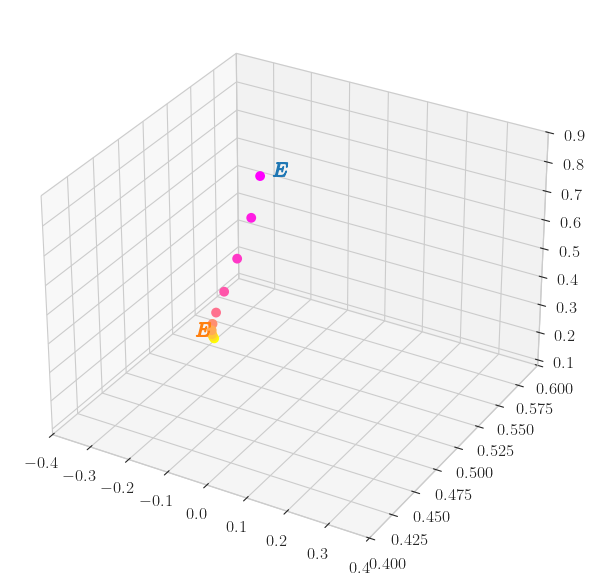

In [8]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from tqdm import tqdm

batch_size = ep_data[0][0]['s_init'].shape[0]
n_traj = (len(ep_data[0]) - 1) * batch_size + ep_data[0][-1]['s_init'].shape[0]


def plot_traj(epoch, traj_idx):
    fig, ax = plt.subplots(
        subplot_kw={'projection': '3d'},
        figsize=(8, 6)
    )

    batch_idx = traj_idx // batch_size
    traj_i = traj_idx % batch_size

    partition_ids = [7]

    s_init = ep_data[epoch][batch_idx]['s_init'][traj_i]
    s_final = ep_data[epoch][batch_idx]['s_final'][traj_i]
    traj_pred = ep_data[epoch][batch_idx]['y_pred'][traj_i]
    traj_rect = ep_data[epoch][batch_idx]['y_rectified'][traj_i]

    T = traj_pred.shape[0]

    _, eff_pos_init = np.hsplit(s_init, partition_ids)
    _, eff_pos_final = np.hsplit(s_final, partition_ids)
    # _, eff_pos_pred = np.hsplit(traj_pred, partition_ids)
    # _, eff_pos_rect = np.hsplit(traj_rect, partition_ids)
    eff_pos_pred = traj_pred
    eff_pos_rect = traj_rect

    ax.scatter(*eff_pos_init, marker='$E$', s=100, color='C0', label='Initial effector position')
    ax.scatter(*eff_pos_final, marker='$E$', s=100, color='C1', label='Final effector position')

    ax.scatter(
        eff_pos_pred[:, 0], eff_pos_pred[:, 1], eff_pos_pred[:, 2],
        c=list(range(T)), cmap='spring',
        s=50,
        edgecolors='none',
        alpha=1.0,
        label='Effector predicted position'
    )
    # ax.scatter(
    #     eff_pos_rect[:, 0], eff_pos_rect[:, 1], eff_pos_rect[:, 2],
    #     marker='*',
    #     s=80,
    #     c=list(range(T + 1)), cmap='copper',
    #     edgecolors='none',
    #     alpha=1.0,
    #     label='Effector rectified position'
    # )

    ax.set_xlim(-0.4, 0.4)
    ax.set_ylim(0.4, 0.6)
    ax.set_zlim(0.08, 0.9)

    # ax.legend(
    #     bbox_to_anchor=(0., -0.15, 1., .102),
    #     loc='lower left',
    #     ncols=2,
    #     mode='expand',
    #     borderaxespad=0.
    # )

    # ax.set_title(
    #     fr'RMSprop($\eta=10^{{-3}}$), epoch {epoch + 1}'
    #     '\n'
    #     r'Optimizing intermediate errors, $\mathcal{L}_{\rm FM}\left[\mathbf{\hat{s}}(1), \mathbf{s}(0)\right]$, and $\mathcal{L}_{\rm FM}\left[\mathbf{\hat{s}}(T-1), \mathbf{s}(T)\right]$',
    # )
    # fig.tight_layout()

    return fig


# n_samples = 100
# sample_ids = np.random.randint(0, n_traj, n_samples)
#
# pp = PdfPages('../plots/kinematics/traj_gru1-d=20-head=10_traj=10_custom-full-no-pre_50ep_RMSprop(lr=0.001)_si0-sf0-err-opt_eff-only_traj-sample.pdf')
#
# for sample_id in tqdm(sample_ids):
#     pp.savefig(plot_traj(epoch=49, traj_idx=sample_id))
#     plt.close()
#
# pp.close()

idx = np.random.randint(0, n_traj)

print(idx)

plot_traj(epoch=49, traj_idx=3792)
plt.tight_layout()
# plt.show()
plt.savefig('../plots/kinematics/traj-3792.pdf')

# 3792, 5302

# Good: 5643, 9973, 4952, 11882, 9131, 822, 3792, 1885
# Bad: 871, 4558, 5302

[4558, 5302, 934]


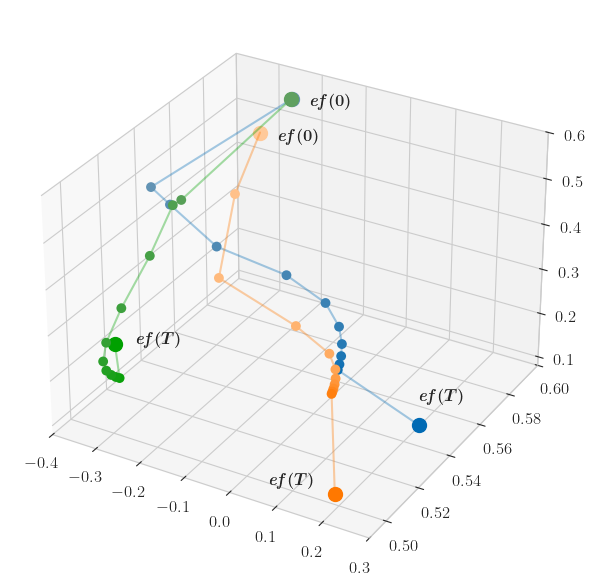

In [284]:
import matplotlib as mpl
import matplotlib.colors as mplc
import matplotlib.pyplot as plt

epoch = 49
batch_size = ep_data[0][0]['s_init'].shape[0]
n_traj = (len(ep_data[0]) - 1) * batch_size + ep_data[0][-1]['s_init'].shape[0]

n_samples = 3
traj_ids = np.random.randint(0, n_traj, n_samples)

# Good
# traj_ids = [
#     3792,
#     # 9973,
#     # 9131,
#     # 11882,
#     2870,
#     10256,
#     822
# ] # [5643, 9973, 4952, 11882, 9131, 822, 3792, 1885]

# Bad
traj_ids = [
    # 871,
    4558,
    5302,
    # 656,
    934
]

print(traj_ids)

fig, ax = plt.subplots(
    subplot_kw={'projection': '3d'},
    figsize=(8, 6)
)

ax.set_xlim(-0.4, 0.3)
ax.set_ylim(0.49, 0.6)
ax.set_zlim(0.08, 0.6)

cmap = mpl.colormaps['tab10'].colors

for i, traj_idx in enumerate(traj_ids):
    batch_idx = traj_idx // batch_size
    traj_i = traj_idx % batch_size

    partition_ids = [7]

    s_init = ep_data[epoch][batch_idx]['s_init'][traj_i]
    s_final = ep_data[epoch][batch_idx]['s_final'][traj_i]
    traj_pred = ep_data[epoch][batch_idx]['y_pred'][traj_i]
    traj_rect = ep_data[epoch][batch_idx]['y_rectified'][traj_i]

    T = traj_pred.shape[0]

    _, eff_pos_init = np.hsplit(s_init, partition_ids)
    _, eff_pos_final = np.hsplit(s_final, partition_ids)
    eff_pos_pred = traj_pred
    eff_pos_rect = traj_rect

    eff_pos_all = np.vstack((eff_pos_init, eff_pos_pred, eff_pos_final))

    base_h, _, base_v = mplc.rgb_to_hsv(cmap[i])
    sat = np.linspace(0.4, 1.0, len(eff_pos_all))
    colors = np.array([
        mplc.hsv_to_rgb([base_h, s, base_v])
        for s in sat
    ])

    ax.scatter(*eff_pos_init, s=100, color=colors[0], label='Initial effector position')
    ax.scatter(*eff_pos_final, s=100, color=colors[-1], label='Final effector position')

    ax.scatter(
        eff_pos_pred[:, 0], eff_pos_pred[:, 1], eff_pos_pred[:, 2],
        c=colors[1:-1],
        s=50,
        edgecolors='none',
        alpha=1.0,
        label='Effector predicted position'
    )
    ax.plot(
        eff_pos_all[:, 0], eff_pos_all[:, 1], eff_pos_all[:, 2],
        # linestyle='-.',
        alpha=0.35,
        color=colors[-1]
    )

# Good
# ax.text(-0.18, 0.6, 0.55, r'$\bm{\mathit{ef}(0)}$', size=12, zorder=100, ha='right')
# ax.text(-0.3, 0.58, 0.54, r'$\bm{\mathit{ef}(0)}$', size=12, zorder=100, ha='right')
# ax.text(-0.3, 0.545, 0.54, r'$\bm{\mathit{ef}(0)}$', size=12, zorder=100, ha='right')
# ax.text(-0.25, 0.6, 0.12, r'$\bm{\mathit{ef}(T)}$', size=12, zorder=100, ha='right')
# ax.text(-0.2, 0.57, 0.11, r'$\bm{\mathit{ef}(T)}$', size=12, zorder=100, ha='right')
# ax.text(-0.32, 0.52, 0.13, r'$\bm{\mathit{ef}(T)}$', size=12, zorder=100, ha='right')
# ax.text(0.08, 0.53, 0.12, r'$\bm{\mathit{ef}(T)}$', size=12, zorder=100, ha='right')

# Bad
ax.text(-0.13, 0.6, 0.55, r'$\bm{\mathit{ef}(0)}$', size=12, zorder=100, ha='right')
ax.text(-0.13, 0.58, 0.53, r'$\bm{\mathit{ef}(0)}$', size=12, zorder=100, ha='right')
ax.text(-0.3, 0.54, 0.15, r'$\bm{\mathit{ef}(T)}$', size=12, zorder=100, ha='right')
ax.text(0.15, 0.5, 0.11, r'$\bm{\mathit{ef}(T)}$', size=12, zorder=100, ha='right')
ax.text(0.3, 0.55, 0.17, r'$\bm{\mathit{ef}(T)}$', size=12, zorder=100, ha='right')

plt.tight_layout()
# plt.show()
plt.savefig('../plots/kinematics/traj-bad.pdf')

# 3792, 5302
# [1723  595 4152]

# Good: 5643, 9973, 4952, 11882, 9131, 822, 3792, 1885, 2870, 10256
# Bad: 871, 4558, 5302, 934

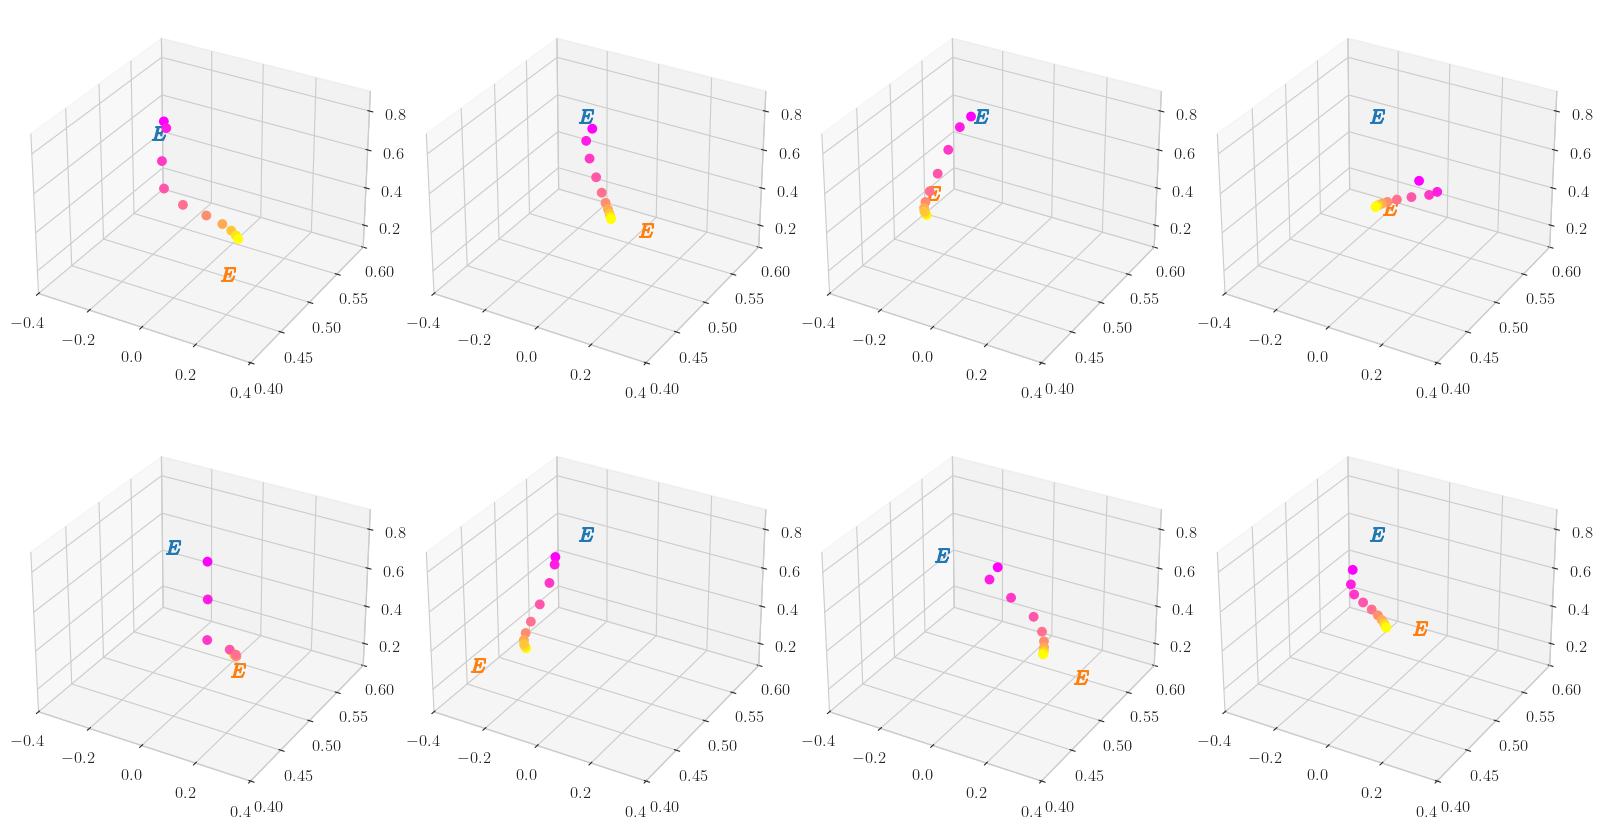

In [12]:
import matplotlib.pyplot as plt

batch_size = ep_data[0][0]['s_init'].shape[0]
n_traj = (len(ep_data[0]) - 1) * batch_size + ep_data[0][-1]['s_init'].shape[0]

shape = (2, 4)
n_samples = shape[0] * shape[1]
sample_ids = np.random.randint(0, n_traj, n_samples).reshape(shape)
epoch = 49

fig, axs = plt.subplots(
    nrows=shape[0], ncols=shape[1],
    subplot_kw={'projection': '3d'},
    figsize=(16, 9)
)

for i, row in enumerate(sample_ids):
    for j, traj_idx in enumerate(row):
        batch_idx = traj_idx // batch_size
        traj_i = traj_idx % batch_size

        partition_ids = [7]

        s_init = ep_data[epoch][batch_idx]['s_init'][traj_i]
        s_final = ep_data[epoch][batch_idx]['s_final'][traj_i]
        traj_pred = ep_data[epoch][batch_idx]['y_pred'][traj_i]
        traj_rect = ep_data[epoch][batch_idx]['y_rectified'][traj_i]

        T = traj_pred.shape[0]

        _, eff_pos_init = np.hsplit(s_init, partition_ids)
        _, eff_pos_final = np.hsplit(s_final, partition_ids)
        eff_pos_pred = traj_pred
        eff_pos_rect = traj_rect

        axs[i, j].scatter(*eff_pos_init, marker='$E$', s=100, color='C0', label='Initial effector position')
        axs[i, j].scatter(*eff_pos_final, marker='$E$', s=100, color='C1', label='Final effector position')

        axs[i, j].scatter(
            eff_pos_pred[:, 0], eff_pos_pred[:, 1], eff_pos_pred[:, 2],
            c=list(range(T)), cmap='spring',
            s=50,
            edgecolors='none',
            alpha=1.0,
            label='Effector predicted position'
        )
        # axs[i, j].scatter(
        #     eff_pos_rect[:, 0], eff_pos_rect[:, 1], eff_pos_rect[:, 2],
        #     marker='*',
        #     s=80,
        #     c=list(range(T + 1)), cmap='copper',
        #     edgecolors='none',
        #     alpha=1.0,
        #     label='Effector rectified position'
        # )

        axs[i, j].set_xlim(-0.4, 0.4)
        axs[i, j].set_ylim(0.4, 0.6)
        axs[i, j].set_zlim(0.08, 0.9)

        # axs[i, j].legend(
        #     bbox_to_anchor=(0., -0.15, 1., .102),
        #     loc='lower left',
        #     ncols=2,
        #     mode='expand',
        #     borderaxespad=0.
        # )

plt.tight_layout()
# plt.show()
plt.savefig('../plots/kinematics/traj_sample.pdf', dpi=300)

In [7]:
samples = []

In [10]:
samples.append(sample_ids)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from tqdm.notebook import tqdm


def plot_violin(epoch: int):
    fig, axs = plt.subplots(
        nrows=4,
        figsize=(20, 30)
    )

    s_init = np.vstack([
        batch['s_init']
        for batch in ep_data[epoch]
    ])
    s_final = np.vstack([
        batch['s_final']
        for batch in ep_data[epoch]
    ])
    traj_pred = np.vstack([
        batch['y_pred']
        for batch in ep_data[epoch]
    ])
    traj_rect = np.vstack([
        batch['y_rectified']
        for batch in ep_data[epoch]
    ])


    entries = {
        'Initial state': s_init,
        'Final state': s_final,
        'Predicted trajectory': traj_pred,
        'Rectified trajectory': traj_rect
    }

    for idx, (title, records) in enumerate(entries.items()):
        sns.violinplot(
            data=pd.DataFrame({
                comp: (
                    np.ravel(records[:, :, i])
                    if records.ndim == 3
                    else records[:, i]
                )
                for i, comp in enumerate([
                    'obj1_X', 'obj1_Y', 'obj1_Z',
                    'obj1_RX', 'obj1_RY', 'obj1_RZ',
                    'obj2_X', 'obj2_Y', 'obj2_Z',
                    'obj2_RX', 'obj2_RY', 'obj2_RZ',
                    *(f'joint_{j}' for j in range(7)),
                    'eff_X', 'eff_Y', 'eff_Z',
                    'eff_RX', 'eff_RY', 'eff_RZ',
                    'magnet'
                ])
            }),
            ax=axs[idx]
        )
        axs[idx].set_title(f'{title}, epoch {epoch}')
        axs[idx].grid(True)

pp = PdfPages('../plots/block-stack/traj_custom_sgd_epochs-violin_lr=0.001.pdf')

for epoch in tqdm(range(len(ep_data))):
    pp.savefig(plot_violin(epoch))
    plt.close()

pp.close()

  0%|          | 0/300 [00:00<?, ?it/s]

Dist init: 0.1336 +- 0.1084
Dist final: 0.1394 +- 0.0506
AVG step dist: 0.0605 +- 0.0139
MAX step dist dev: 0.1272 +- 0.0831
AVG angle: 153.0125 +- 8.8227
MIN angle: 69.9127 +- 1.3134



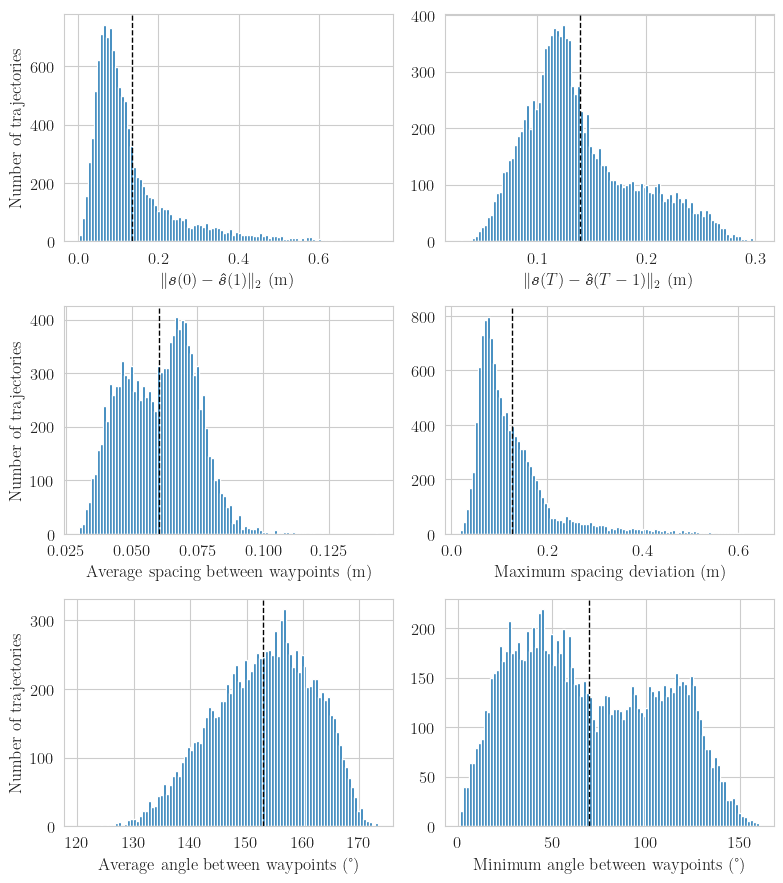

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import pandas as pd
import seaborn as sns

def get_angle(a: np.ndarray, b: np.ndarray, c: np.ndarray) -> float:
    v1 = a - b
    v2 = c - b

    return np.arccos(np.einsum('ij,ij->i', v1, v2) / (la.norm(v1, axis=1) * la.norm(v2, axis=1)))

epoch = -1

s_init_joints, s_init_eff = np.hsplit(
    np.vstack([
        batch['s_init']
        for batch in ep_data[epoch]
    ]),
    [7]
)

s_final_joints, s_final_eff = np.hsplit(
    np.vstack([
        batch['s_final']
        for batch in ep_data[epoch]
    ]),
    [7]
)

traj_pred_eff = np.vstack([
    batch['y_pred']
    for batch in ep_data[epoch]
])

traj_rect_joints, traj_rect_eff = np.split(
    np.vstack([
        batch['y_rectified']
        for batch in ep_data[epoch]
    ]),
    [7],
    axis=2
)

# mae_init_eff = np.mean(np.abs(s_init_eff - traj_pred_eff[:, 0]), axis=1)
# mae_final_eff = np.mean(np.abs(s_final_eff - traj_pred_eff[:, -1]), axis=1)

d_init_eff = la.norm(s_init_eff - traj_pred_eff[:, 0], axis=1)
d_final_eff = la.norm(s_final_eff - traj_pred_eff[:, -1], axis=1)

all_waypoints = np.concatenate(
    [
        s_init_eff[:, np.newaxis, :],
        traj_pred_eff,
        s_final_eff[:, np.newaxis, :]
    ],
    axis=1
)

step_dists = np.vstack([
    la.norm(all_waypoints[:, t] - all_waypoints[:, t + 1], axis=1)
    for t in range(all_waypoints.shape[1] - 1)
]).T

step_dist_means = np.mean(step_dists, axis=1)

step_dist_devs = np.vstack([
    np.abs(step_dists[:, t] - step_dist_means)
    for t in range(step_dists.shape[1])
]).T

step_dist_max_dev = np.max(step_dist_devs, axis=1)

angles = np.vstack([
    np.degrees(
        get_angle(
            all_waypoints[:, t],
            all_waypoints[:, t + 1],
            all_waypoints[:, t + 2]
        )
    )
    for t in range(all_waypoints.shape[1] - 2)
]).T

angles_means = np.mean(angles, axis=1)
angles_min = np.min(angles, axis=1)

fig, axs = plt.subplots(
    nrows=3,
    ncols=2,
    figsize=(8, 9)
)

n_bins = 100

axs[0, 0].hist(d_init_eff, bins=n_bins)
axs[0, 0].axvline(d_init_eff.mean(), color='k', linestyle='--', linewidth=1)
axs[0, 0].set_xlabel(r'$\lVert\bm{s}(0) - \bm{\hat{s}}(1)\rVert_2$ (m)')
axs[0, 0].set_ylabel('Number of trajectories')

axs[0, 1].hist(d_final_eff, bins=n_bins)
axs[0, 1].axvline(d_final_eff.mean(), color='k', linestyle='--', linewidth=1)
axs[0, 1].set_xlabel(r'$\lVert\bm{s}(T) - \bm{\hat{s}}(T-1)\rVert_2$ (m)')

axs[1, 0].hist(step_dist_means, bins=n_bins)
axs[1, 0].axvline(step_dist_means.mean(), color='k', linestyle='--', linewidth=1)
axs[1, 0].set_xlabel('Average spacing between waypoints (m)')
axs[1, 0].set_ylabel('Number of trajectories')

axs[1, 1].hist(step_dist_max_dev, bins=n_bins)
axs[1, 1].axvline(step_dist_max_dev.mean(), color='k', linestyle='--', linewidth=1)
axs[1, 1].set_xlabel('Maximum spacing deviation (m)')

axs[2, 0].hist(angles_means, bins=n_bins)
axs[2, 0].axvline(angles_means.mean(), color='k', linestyle='--', linewidth=1)
axs[2, 0].set_xlabel(r'Average angle between waypoints (\textdegree)')
axs[2, 0].set_ylabel('Number of trajectories')

axs[2, 1].hist(angles_min, bins=n_bins)
axs[2, 1].axvline(angles_min.mean(), color='k', linestyle='--', linewidth=1)
axs[2, 1].set_xlabel(r'Minimum angle between waypoints (\textdegree)')

# fig.suptitle(data[fname][0])

print(
    f'Dist init: {d_init_eff.mean():.4f} +- {d_init_eff.std():.4f}\n'
    f'Dist final: {d_final_eff.mean():.4f} +- {d_final_eff.std():.4f}\n'
    f'AVG step dist: {step_dist_means.mean():.4f} +- {step_dist_means.std():.4f}\n'
    f'MAX step dist dev: {step_dist_max_dev.mean():.4f} +- {step_dist_max_dev.std():.4f}\n'
    f'AVG angle: {angles_means.mean():.4f} +- {angles_means.std():.4f}\n'
    f'MIN angle: {angles_min.mean():.4f} +- {angles_max.std():.4f}\n'
)

plt.tight_layout()
# plt.show()
plt.savefig(f'../plots/kinematics/{os.path.basename(os.path.split(fname)[-2])}_last-epoch_hists.pdf')

Dist init: 0.1336 +- 0.1084
Dist final: 0.1394 +- 0.0506
AVG step dist: 0.0605 +- 0.0139
MAX step dist dev: 0.1272 +- 0.0831
AVG angle: 153.0125 +- 8.8227
MIN angle: 69.9127 +- 1.3134



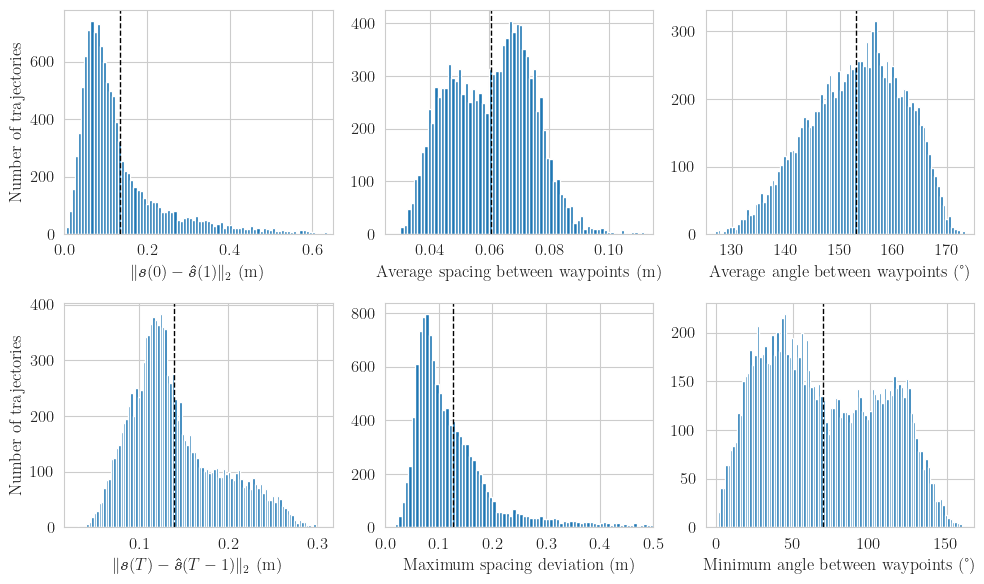

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import pandas as pd
import seaborn as sns


epoch = -1

s_init_joints, s_init_eff = np.hsplit(
    np.vstack([
        batch['s_init']
        for batch in ep_data[epoch]
    ]),
    [7]
)

s_final_joints, s_final_eff = np.hsplit(
    np.vstack([
        batch['s_final']
        for batch in ep_data[epoch]
    ]),
    [7]
)

traj_pred_eff = np.vstack([
    batch['y_pred']
    for batch in ep_data[epoch]
])

traj_rect_joints, traj_rect_eff = np.split(
    np.vstack([
        batch['y_rectified']
        for batch in ep_data[epoch]
    ]),
    [7],
    axis=2
)

d_init_eff = la.norm(s_init_eff - traj_pred_eff[:, 0], axis=1)
d_final_eff = la.norm(s_final_eff - traj_pred_eff[:, -1], axis=1)

all_waypoints = np.concatenate(
    [
        s_init_eff[:, np.newaxis, :],
        traj_pred_eff,
        s_final_eff[:, np.newaxis, :]
    ],
    axis=1
)

step_dists = np.vstack([
    la.norm(all_waypoints[:, t] - all_waypoints[:, t + 1], axis=1)
    for t in range(all_waypoints.shape[1] - 1)
]).T

step_dist_means = np.mean(step_dists, axis=1)

step_dist_devs = np.vstack([
    np.abs(step_dists[:, t] - step_dist_means)
    for t in range(step_dists.shape[1])
]).T

step_dist_max_dev = np.max(step_dist_devs, axis=1)

angles = np.vstack([
    np.degrees(
        get_angle(
            all_waypoints[:, t],
            all_waypoints[:, t + 1],
            all_waypoints[:, t + 2]
        )
    )
    for t in range(all_waypoints.shape[1] - 2)
]).T

angles_means = np.mean(angles, axis=1)
angles_min = np.min(angles, axis=1)

fig, axs = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(10, 6)
)

n_bins = 100

axs[0, 0].hist(d_init_eff, bins=n_bins)
axs[0, 0].axvline(d_init_eff.mean(), color='k', linestyle='--', linewidth=1)
axs[0, 0].set_xlabel(r'$\lVert\bm{s}(0) - \bm{\hat{s}}(1)\rVert_2$ (m)')
axs[0, 0].set_ylabel('Number of trajectories')
axs[0, 0].set_xlim(0.0, 0.65)

axs[1, 0].hist(d_final_eff, bins=n_bins)
axs[1, 0].axvline(d_final_eff.mean(), color='k', linestyle='--', linewidth=1)
axs[1, 0].set_xlabel(r'$\lVert\bm{s}(T) - \bm{\hat{s}}(T-1)\rVert_2$ (m)')
axs[1, 0].set_ylabel('Number of trajectories')

axs[0, 1].hist(step_dist_means, bins=n_bins)
axs[0, 1].axvline(step_dist_means.mean(), color='k', linestyle='--', linewidth=1)
axs[0, 1].set_xlabel('Average spacing between waypoints (m)')
axs[0, 1].set_xlim(0.025, 0.115)

axs[1, 1].hist(step_dist_max_dev, bins=n_bins)
axs[1, 1].axvline(step_dist_max_dev.mean(), color='k', linestyle='--', linewidth=1)
axs[1, 1].set_xlabel('Maximum spacing deviation (m)')
axs[1, 1].set_xlim(0.0, 0.5)

axs[0, 2].hist(angles_means, bins=n_bins)
axs[0, 2].axvline(angles_means.mean(), color='k', linestyle='--', linewidth=1)
axs[0, 2].set_xlabel(r'Average angle between waypoints (\textdegree)')
axs[0, 2].set_xlim(125, 175)

axs[1, 2].hist(angles_min, bins=n_bins)
axs[1, 2].axvline(angles_min.mean(), color='k', linestyle='--', linewidth=1)
axs[1, 2].set_xlabel(r'Minimum angle between waypoints (\textdegree)')

# fig.suptitle(data[fname][0])

print(
    f'Dist init: {d_init_eff.mean():.4f} +- {d_init_eff.std():.4f}\n'
    f'Dist final: {d_final_eff.mean():.4f} +- {d_final_eff.std():.4f}\n'
    f'AVG step dist: {step_dist_means.mean():.4f} +- {step_dist_means.std():.4f}\n'
    f'MAX step dist dev: {step_dist_max_dev.mean():.4f} +- {step_dist_max_dev.std():.4f}\n'
    f'AVG angle: {angles_means.mean():.4f} +- {angles_means.std():.4f}\n'
    f'MIN angle: {angles_min.mean():.4f} +- {angles_max.std():.4f}\n'
)

plt.tight_layout()
plt.show()
# plt.savefig(f'../plots/kinematics/{os.path.basename(os.path.split(fname)[-2])}_last-epoch_hists_landscape.pdf')